In [1]:
#!pip install shap
!pip install sklearn
import pandas as pd
import numpy as np
import shap
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\sonic\AppData\Local\Temp\pip-install-htkvaz15\sklearn_ebb402f4e2d54ad594d77904fe1f5972\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\sonic\anaconda3\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [2]:
df_merged = pd.read_csv("./use_data/merged_dataset.csv")
#Drop all rows with unknown age_range
df_filtered = df_merged[df_merged['age_range'] > 0]
#Drop all rows with unknown gender
df_filtered = df_filtered[df_filtered['gender'] < 2]
df_filtered

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
2,109881,230,629,1,1662.0,820,0,4.0,0.0
3,109881,230,629,1,1662.0,820,0,4.0,0.0
4,109881,230,629,1,1662.0,820,0,4.0,0.0
5,142526,193,656,2781,6885.0,1111,0,6.0,0.0
6,123526,304,559,3989,3650.0,620,0,5.0,1.0
...,...,...,...,...,...,...,...,...,...
6543,199553,175,1181,4760,247.0,1031,0,5.0,0.0
6544,73105,259,614,637,2603.0,1111,0,2.0,0.0
6545,403421,175,1181,4760,247.0,1111,0,3.0,1.0
6546,116738,186,267,1200,2276.0,1110,0,2.0,1.0


In [3]:
average_age = df_filtered['age_range'].mean()
average_age
print("Average age around 28")

Average age around 28


In [4]:
average_gender = df_filtered['gender'].mean()
average_gender
print("Women are more likely buyers")

Women are more likely buyers


In [5]:
item_age = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df_filtered.iterrows():
    if row['item_id'] not in item_age:
        # there may be multiple entries, so default with an empty list
        item_age[row["item_id"]] = [] 
    item_age[row["item_id"]].append(row["age_range"])

item_age_average = {}
for row in item_age.items():
    item_age_average[row[0]] = np.nansum(row[1])/len(row[1])
sorted(item_age_average.items())

[(161.0, 4.333333333333333),
 (162.0, 4.0),
 (163.0, 3.5),
 (164.0, 3.0),
 (165.0, 3.0),
 (166.0, 4.0),
 (167.0, 5.5),
 (168.0, 3.5714285714285716),
 (169.0, 3.0),
 (170.0, 4.771739130434782),
 (171.0, 3.0),
 (172.0, 5.25),
 (173.0, 3.2285714285714286),
 (174.0, 3.9535864978902953),
 (175.0, 3.3096085409252667),
 (176.0, 5.634615384615385),
 (177.0, 5.5),
 (178.0, 3.7264150943396226),
 (179.0, 5.166666666666667),
 (180.0, 3.0),
 (181.0, 3.6666666666666665),
 (182.0, 5.0),
 (183.0, 4.375),
 (184.0, 4.296875),
 (185.0, 5.625),
 (186.0, 3.5),
 (187.0, 3.0),
 (188.0, 3.0),
 (189.0, 3.793103448275862),
 (190.0, 3.575),
 (191.0, 2.75),
 (192.0, 2.2),
 (193.0, 3.6142857142857143),
 (194.0, 4.5),
 (195.0, 3.6666666666666665),
 (197.0, 3.6666666666666665),
 (198.0, 4.24),
 (199.0, 4.0),
 (201.0, 4.478260869565218),
 (202.0, 3.9),
 (203.0, 3.3333333333333335),
 (204.0, 4.0),
 (205.0, 5.25),
 (206.0, 2.5),
 (207.0, 4.5),
 (208.0, 4.555555555555555),
 (209.0, 3.4285714285714284),
 (210.0, 4.068965

In [6]:
item_gender = {}

# go through user_seller sub-dataframe and split entries by user_id:seller_id
for index, row in df_filtered.iterrows():
    if row['item_id'] not in item_gender:
        # there may be multiple entries, so default with an empty list
        item_gender[row["item_id"]] = [] 
    item_gender[row["item_id"]].append(row["gender"])

item_gender_average = {}
for row in item_gender.items():
    item_gender_average[row[0]] = np.nansum(row[1])/len(row[1])
sorted(item_gender_average.items())

[(161.0, 0.3333333333333333),
 (162.0, 0.0),
 (163.0, 0.375),
 (164.0, 0.0),
 (165.0, 0.0),
 (166.0, 1.0),
 (167.0, 0.0),
 (168.0, 0.0),
 (169.0, 0.5),
 (170.0, 0.06521739130434782),
 (171.0, 0.0),
 (172.0, 0.5),
 (173.0, 0.1523809523809524),
 (174.0, 0.12236286919831224),
 (175.0, 0.5409252669039146),
 (176.0, 0.6153846153846154),
 (177.0, 0.0),
 (178.0, 0.18396226415094338),
 (179.0, 0.0),
 (180.0, 1.0),
 (181.0, 0.26666666666666666),
 (182.0, 0.0),
 (183.0, 0.09722222222222222),
 (184.0, 0.015625),
 (185.0, 0.0),
 (186.0, 0.25),
 (187.0, 0.0),
 (188.0, 0.0),
 (189.0, 0.034482758620689655),
 (190.0, 0.1),
 (191.0, 0.75),
 (192.0, 1.0),
 (193.0, 0.15714285714285714),
 (194.0, 0.5),
 (195.0, 0.0),
 (197.0, 0.3333333333333333),
 (198.0, 0.48),
 (199.0, 0.0),
 (201.0, 0.6956521739130435),
 (202.0, 0.3),
 (203.0, 0.0),
 (204.0, 0.0),
 (205.0, 1.0),
 (206.0, 0.5),
 (207.0, 0.5),
 (208.0, 0.0),
 (209.0, 0.17857142857142858),
 (210.0, 0.10344827586206896),
 (211.0, 0.6428571428571429),
 (212

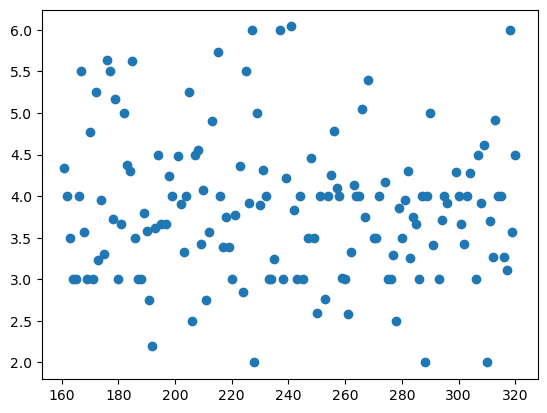

In [7]:
plt.plot(item_age_average.keys(),item_age_average.values(),'o')

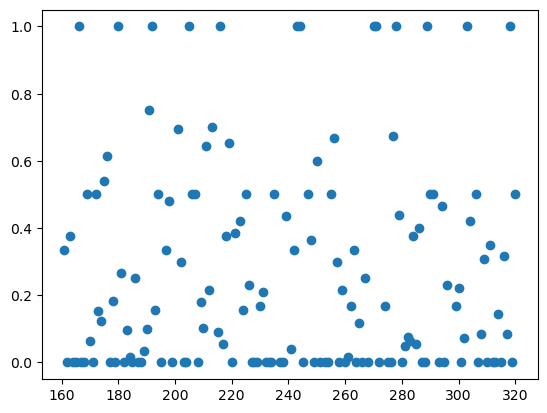

In [8]:
plt.plot(item_gender_average.keys(),item_gender_average.values(),'o')

In [9]:
item_age_avg_column = []
item_gender_avg_column = []
for index, row in df_filtered.iterrows():
    item_age_avg_column.append(round(item_age_average[row['item_id']],2))
    item_gender_avg_column.append(round(item_gender_average[row['item_id']],2))

In [10]:
df_filtered['avg_age'] = item_age_avg_column
df_filtered['avg_gender'] = item_gender_avg_column
df_filtered

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,avg_age,avg_gender
2,109881,230,629,1,1662.0,820,0,4.0,0.0,3.89,0.17
3,109881,230,629,1,1662.0,820,0,4.0,0.0,3.89,0.17
4,109881,230,629,1,1662.0,820,0,4.0,0.0,3.89,0.17
5,142526,193,656,2781,6885.0,1111,0,6.0,0.0,3.61,0.16
6,123526,304,559,3989,3650.0,620,0,5.0,1.0,4.28,0.42
...,...,...,...,...,...,...,...,...,...,...,...
6543,199553,175,1181,4760,247.0,1031,0,5.0,0.0,3.31,0.54
6544,73105,259,614,637,2603.0,1111,0,2.0,0.0,3.02,0.22
6545,403421,175,1181,4760,247.0,1111,0,3.0,1.0,3.31,0.54
6546,116738,186,267,1200,2276.0,1110,0,2.0,1.0,3.50,0.25


In [11]:
user_log = pd.read_csv('../data_format1/use_data/train_format1[161-320].csv')
repeat = user_log.loc[user_log['label'] == 1]
repeat.head()

,user_id,merchant_id,label
2,134532,3323,1
9,87972,4760,1
17,88275,3828,1
24,283392,3323,1
40,227925,4282,1


In [12]:
repeat_user_ids = repeat['user_id'].to_numpy()
repeat_merchant_ids = repeat['merchant_id'].to_numpy()
repeat_transactions = df_filtered.loc[df_filtered['user_id'].isin(repeat_user_ids) & df_filtered['seller_id'].isin(repeat_merchant_ids)]
repeat_transactions

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,avg_age,avg_gender
272,68225,279,898,3323,683.0,1108,0,5.0,1.0,3.86,0.44
1319,5524,224,614,4955,7924.0,1111,0,3.0,0.0,2.84,0.16
2487,88275,170,1095,3828,1446.0,528,0,4.0,0.0,4.77,0.07
2542,55784,281,1130,246,5380.0,1111,0,4.0,0.0,3.95,0.05
3136,177770,279,898,3323,683.0,1110,0,3.0,1.0,3.86,0.44
3137,177770,279,898,3323,683.0,1110,0,3.0,1.0,3.86,0.44
3138,177770,279,898,3323,683.0,1111,0,3.0,1.0,3.86,0.44
3139,177770,279,898,3323,683.0,1107,0,3.0,1.0,3.86,0.44
3255,227925,277,1023,4282,7989.0,627,0,3.0,0.0,3.29,0.67
3844,79189,277,1023,4282,7892.0,801,0,3.0,1.0,3.29,0.67


In [13]:
repeat_transactions_gender = {}
for i in range(0,2):
    repeat_transactions_gender[i] = repeat_transactions.loc[repeat_transactions['gender'] == i].shape[0]
repeat_transactions_gender

{0: 6, 1: 16}

In [14]:
repeat_transactions_age = {}
for i in range(0,9):
    repeat_transactions_age[i] = repeat_transactions.loc[repeat_transactions['age_range'] == i].shape[0]
repeat_transactions_age

{0: 0, 1: 0, 2: 0, 3: 16, 4: 5, 5: 1, 6: 0, 7: 0, 8: 0}

In [15]:
repeat_transactions_gender_chance = {}
for key in repeat_transactions_gender:
    repeat_transactions_gender_chance[key] = round(repeat_transactions_gender[key]/sum(repeat_transactions_gender.values()),2)
    
repeat_transactions_age_chance = {}
for key in repeat_transactions_age:
    repeat_transactions_age_chance[key] = round(repeat_transactions_age[key]/sum(repeat_transactions_age.values()),2)
    
print(repeat_transactions_gender_chance)
print(repeat_transactions_age_chance)

{0: 0.27, 1: 0.73}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.73, 4: 0.23, 5: 0.05, 6: 0.0, 7: 0.0, 8: 0.0}


In [18]:
repeat_chance_gender_column = []
repeat_chance_age_column = []
for index, row in df_filtered.iterrows():
    repeat_chance_gender_column.append(repeat_transactions_gender_chance[row['gender']])
    repeat_chance_age_column.append(repeat_transactions_age_chance[row['age_range']])
df_filtered['% repeat gender'] = repeat_chance_gender_column
df_filtered['% repeat age'] = repeat_chance_age_column
df_filtered

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender,avg_age,avg_gender,% repeat age,% repeat gender
2,109881,230,629,1,1662.0,820,0,4.0,0.0,3.89,0.17,0.23,0.27
3,109881,230,629,1,1662.0,820,0,4.0,0.0,3.89,0.17,0.23,0.27
4,109881,230,629,1,1662.0,820,0,4.0,0.0,3.89,0.17,0.23,0.27
5,142526,193,656,2781,6885.0,1111,0,6.0,0.0,3.61,0.16,0.00,0.27
6,123526,304,559,3989,3650.0,620,0,5.0,1.0,4.28,0.42,0.05,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,199553,175,1181,4760,247.0,1031,0,5.0,0.0,3.31,0.54,0.05,0.27
6544,73105,259,614,637,2603.0,1111,0,2.0,0.0,3.02,0.22,0.00,0.27
6545,403421,175,1181,4760,247.0,1111,0,3.0,1.0,3.31,0.54,0.73,0.73
6546,116738,186,267,1200,2276.0,1110,0,2.0,1.0,3.50,0.25,0.00,0.73


In [19]:
'''
RECAP
avg_age: average age for that item id
avg_gender: average gender for that item id
% repeat age: Percentage chance that user will be a repeat buyer by their age
% repeat gender: Percentage chance that user will be a repeat buyer by their gender
'''

'\nRECAP\navg_age: average age for that item id\navg_gender: average gender for that item id\n% repeat age: Percentage chance that user will be a repeat buyer by their age\n% repeat gender: Percentage chance that user will be a repeat buyer by their gender\n'

In [24]:
df_age_gender = df_filtered.iloc[:,7:]
df_age_gender

,age_range,gender,avg_age,avg_gender,% repeat age,% repeat gender
2,4.0,0.0,3.89,0.17,0.23,0.27
3,4.0,0.0,3.89,0.17,0.23,0.27
4,4.0,0.0,3.89,0.17,0.23,0.27
5,6.0,0.0,3.61,0.16,0.00,0.27
6,5.0,1.0,4.28,0.42,0.05,0.73
...,...,...,...,...,...,...
6543,5.0,0.0,3.31,0.54,0.05,0.27
6544,2.0,0.0,3.02,0.22,0.00,0.27
6545,3.0,1.0,3.31,0.54,0.73,0.73
6546,2.0,1.0,3.50,0.25,0.00,0.73


In [26]:
pca = PCA(n_components=2)
pca.fit(df_age_gender)

PCA(n_components=2)

In [27]:
print(pca.explained_variance_ratio_)

[0.7458737  0.11511615]


In [28]:
print(pca.singular_values_)

[100.08311867  39.31844255]
